In [13]:
import sys, os, re, random, warnings, pickle
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from config import *
from utils import *
from ssqa import *

sns.set(style="whitegrid", palette="muted")
warnings.filterwarnings("ignore")

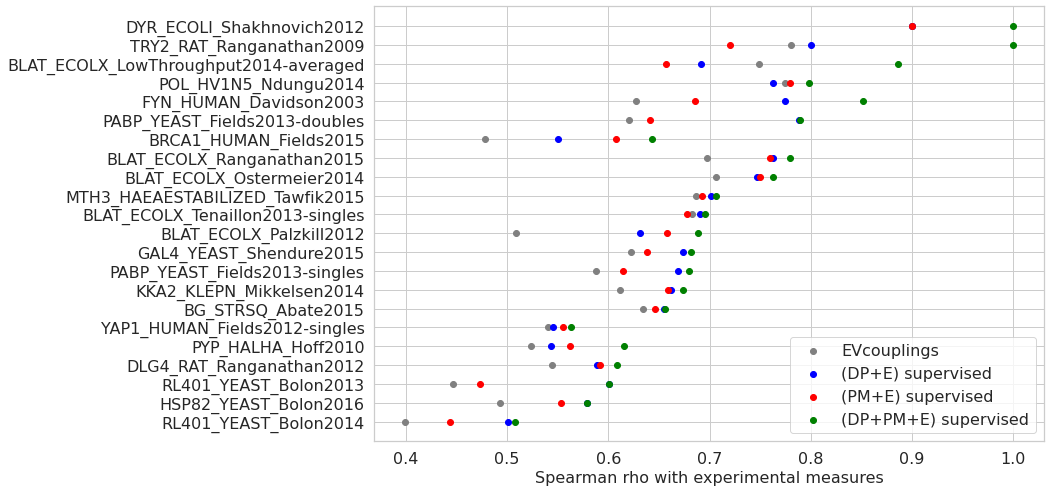

In [31]:
rho_df = pd.read_csv(f"{MUT_DATA}/rho_df.csv", index_col = 0).dropna()
cols = ["ind/E",
                                   "ind/sup/DP", "ind/sup/PM", "ind/sup/PM+DP", "ind/sup/E+DP", "ind/sup/E+PM",
                                   "ind/sup/E+DP+PM",
                                   "ind/unsup/DP", "ind/unsup/PM", "ind/unsup/PM+DP", "ind/unsup/E+DP",
                                   "ind/unsup/E+PM", "ind/unsup/E+DP+PM", "dca/E",
                                   "dca/sup/DP", "dca/sup/PM", "dca/sup/PM+DP", "dca/sup/E+DP", "dca/sup/E+PM",
                                   "dca/sup/E+DP+PM",
                                   "dca/unsup/DP", "dca/unsup/PM", "dca/unsup/PM+DP", "dca/unsup/E+DP",
                                   "dca/unsup/E+PM", "dca/unsup/E+DP+PM"
                                   ]

grouper = rho_df.groupby("dataset")
rho_df2 = grouper.first()[["fam","exp","inpdb","size","length"]]
for c in cols:
    rho_df2[c] = grouper.max(c)[c]
rho_df2["best"] = rho_df2[cols[2:]].max(1)
rho_df2 = rho_df2.sort_values("best")
rho_df2 = rho_df2.reset_index()

plt.figure(figsize=(12,8))
plt.scatter(rho_df2["dca/E"],rho_df2["dca/E"].index, c = "gray")
plt.scatter(rho_df2["dca/sup/E+DP"],rho_df2["dca/sup/E+DP"].index, c = "blue")
plt.scatter(rho_df2["dca/sup/E+PM"],rho_df2["dca/sup/E+PM"].index, c = "red")
plt.scatter(rho_df2["dca/sup/E+DP+PM"],rho_df2["dca/sup/E+DP+PM"].index, c="green")

plt.legend(["EVcouplings", "(DP+E) supervised", "(PM+E) supervised", "(DP+PM+E) supervised"], loc = 4, fontsize = 16)
plt.yticks(rho_df2.index, [f"{fam}_{name_dataset}" for fam, name_dataset in zip(rho_df2.fam.values,rho_df2.dataset.values)], rotation = 0)
plt.xlabel("Spearman rho with experimental measures",fontsize = 16)
plt.yticks(fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [101]:
meta_df = pd.read_excel(f"{MUT_DATA}/meta.xlsx", index_col=0)
H = []
for fam in tqdm(rho_df2.fam):
    dataset = SSQAData_QA(f"{MUT_DATA}/{fam}/data.pt")
    seq_hmm = dataset.seq_hmm[:20]
    H.append(- (seq_hmm * torch.log(seq_hmm+1e-8)).sum().item())

  5%|▍         | 1/22 [00:00<00:02,  7.16it/s]

Available :  seq L seq_hmm pattern


 14%|█▎        | 3/22 [00:00<00:03,  6.22it/s]

Available :  seq L seq_hmm pattern
Available :  seq L seq_hmm pattern


 18%|█▊        | 4/22 [00:01<00:05,  3.24it/s]

Available :  seq L seq_hmm pattern
Available :  seq L seq_hmm pattern


 27%|██▋       | 6/22 [00:02<00:06,  2.49it/s]

Available :  seq L seq_hmm pattern
Available :  seq L seq_hmm pattern


 36%|███▋      | 8/22 [00:03<00:06,  2.07it/s]

Available :  seq L seq_hmm pattern
Available :  seq L seq_hmm pattern


 45%|████▌     | 10/22 [00:04<00:06,  1.98it/s]

Available :  seq L seq_hmm pattern


 50%|█████     | 11/22 [00:04<00:04,  2.48it/s]

Available :  seq L seq_hmm pattern
Available :  seq L seq_hmm pattern


 59%|█████▉    | 13/22 [00:05<00:02,  3.02it/s]

Available :  seq L seq_hmm pattern


 64%|██████▎   | 14/22 [00:05<00:02,  3.27it/s]

Available :  seq L seq_hmm pattern


 68%|██████▊   | 15/22 [00:05<00:01,  3.81it/s]

Available :  seq L seq_hmm pattern
Available :  seq L seq_hmm pattern


 73%|███████▎  | 16/22 [00:06<00:01,  4.09it/s]

Available :  seq L seq_hmm pattern


 82%|████████▏ | 18/22 [00:07<00:01,  2.13it/s]

Available :  seq L seq_hmm pattern


 86%|████████▋ | 19/22 [00:07<00:01,  2.06it/s]

Available :  seq L seq_hmm pattern


 91%|█████████ | 20/22 [00:08<00:00,  2.54it/s]

Available :  seq L seq_hmm pattern


 95%|█████████▌| 21/22 [00:08<00:00,  2.06it/s]

Available :  seq L seq_hmm pattern


100%|██████████| 22/22 [00:09<00:00,  2.44it/s]

Available :  seq L seq_hmm pattern


In [105]:
rho_df2["H"] = H

In [32]:
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#56ae57', 
       '#efb435', '#d3b683', '#c9d179', '#9d0759', "orange", "red"]
random.shuffle(cols)
color = {k:v for k,v in zip(rho_df.fam.unique(), cols)}

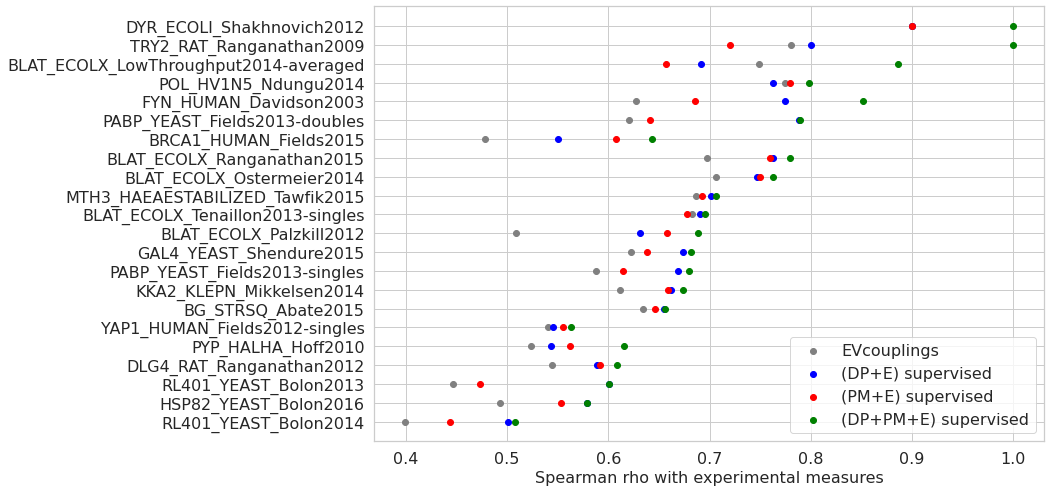

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(rho_df2["dca/E"],rho_df2["dca/E"].index, c = "gray")
plt.scatter(rho_df2["dca/sup/E+DP"],rho_df2["dca/sup/E+DP"].index, c = "blue")
plt.scatter(rho_df2["dca/sup/E+PM"],rho_df2["dca/sup/E+PM"].index, c = "red")
plt.scatter(rho_df2["dca/sup/E+DP+PM"],rho_df2["dca/sup/E+DP+PM"].index, c="green")

plt.legend(["EVcouplings", "(DP+E) supervised", "(PM+E) supervised", "(DP+PM+E) supervised"], loc = 4, fontsize = 16)
plt.yticks(rho_df2.index, [f"{fam}_{name_dataset}" for fam, name_dataset in zip(rho_df2.fam.values,rho_df2.dataset.values)], rotation = 0)
plt.xlabel("Spearman rho with experimental measures",fontsize = 16)
plt.yticks(fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

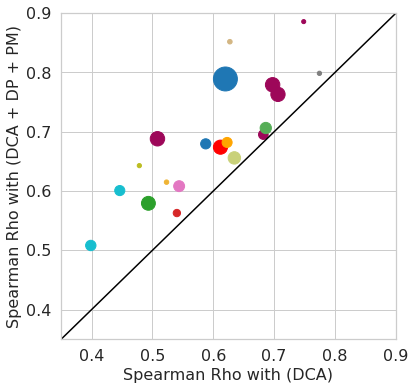

In [107]:
plt.figure(figsize = (6,6))
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["best"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlim(0.35, 0.9)
plt.ylim(0.35, 0.9)
plt.xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.xlabel("Spearman Rho with (DCA)", fontsize = 16)
plt.ylabel("Spearman Rho with (DCA + DP + PM)", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

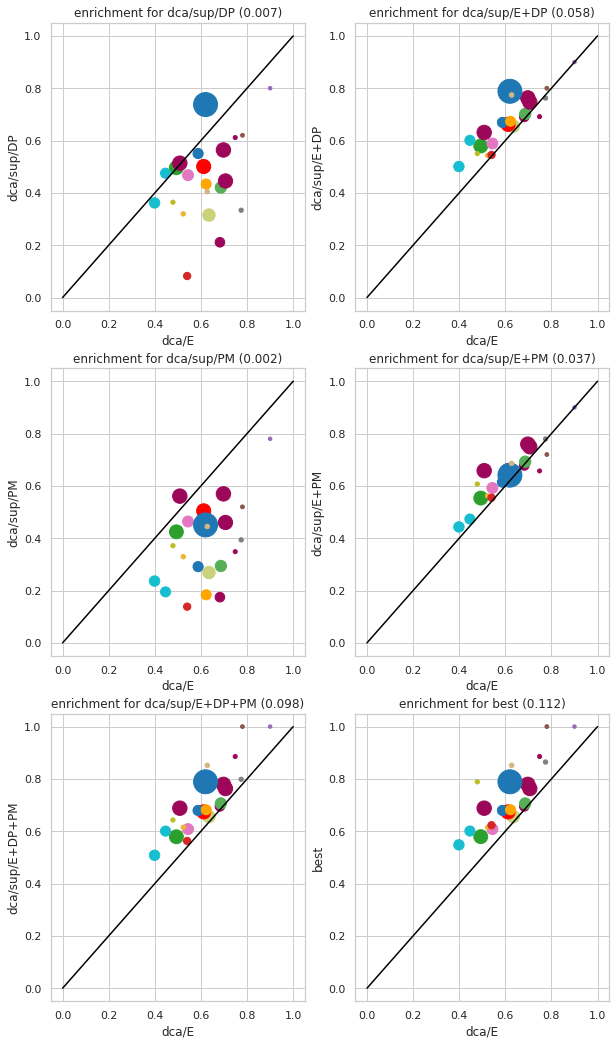

In [35]:
plt.figure(figsize = (10,18))

plt.subplot(3,2,1)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/DP"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/DP")
plt.title(f'enrichment for dca/sup/DP ({(rho_df2["dca/sup/DP"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,2)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/E+DP"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/E+DP")
plt.title(f'enrichment for dca/sup/E+DP ({(rho_df2["dca/sup/E+DP"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,3)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/PM"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/PM")
plt.title(f'enrichment for dca/sup/PM ({(rho_df2["dca/sup/PM"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,4)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/E+PM"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/E+PM")
plt.title(f'enrichment for dca/sup/E+PM ({(rho_df2["dca/sup/E+PM"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,5)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/E+DP+PM"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/E+DP+PM")
plt.title(f'enrichment for dca/sup/E+DP+PM ({(rho_df2["dca/sup/E+DP+PM"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2, 6)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["best"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("best")
plt.title(f'enrichment for best ({(rho_df2["best"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')


plt.show()

In [27]:
from sklearn.linear_model import HuberRegressor, LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score

from scipy.stats import spearmanr, pearsonr

In [28]:
print(pearsonr(y, X[:,0]))

(0.04803399624817367, 0.8704691098805873)


In [110]:
rho_df2["H"]

0     152.568327
1     506.118209
2     152.568327
3     197.331153
4     276.249531
5      63.121605
6     960.923836
7     577.042684
8     193.023021
9     146.237881
10    543.855805
11    543.855805
12    698.646607
13    543.855805
14    543.855805
15    226.811925
16    193.023021
17    126.563227
18    253.968939
19    543.855805
20    475.557064
21    302.642124
Name: H, dtype: float64

In [113]:
np.log(rho_df2["size"].values[:,None])

array([[ 7.16626597],
       [ 8.31971739],
       [ 7.05703698],
       [ 7.3639135 ],
       [ 3.76120012],
       [ 5.7651911 ],
       [ 7.87625888],
       [ 8.38890517],
       [ 7.0800265 ],
       [ 7.02375895],
       [ 8.47803648],
       [ 6.85751406],
       [ 7.49498623],
       [ 8.43620003],
       [ 8.47782847],
       [ 3.55534806],
       [10.5056701 ],
       [ 3.87120101],
       [ 3.63758616],
       [ 3.40119738],
       [ 3.13549422],
       [ 2.77258872]])

In [173]:
rho_df2[rho_df2["H"].values[:,None]/np.log(rho_df2["size"].values[:,None]) > 150]

,dataset,fam,exp,inpdb,size,length,ind/E,ind/sup/DP,ind/sup/PM,ind/sup/PM+DP,...,dca/sup/E+PM,dca/sup/E+DP+PM,dca/unsup/DP,dca/unsup/PM,dca/unsup/PM+DP,dca/unsup/E+DP,dca/unsup/E+PM,dca/unsup/E+DP+PM,best,H
19,LowThroughput2014-averaged,BLAT_ECOLX,Tm,1,30,263,0.794286,0.645714,0.622857,0.622857,...,0.657143,0.885714,0.554286,0.60,0.36,0.748571,0.657143,0.862857,0.885714,543.855805
20,Ranganathan2009,TRY2_RAT,Tm,1,23,223,0.380000,0.780000,0.800000,0.733377,...,0.720000,1.000000,0.520000,0.64,0.48,0.780000,0.780000,0.940000,1.000000,475.557064


(0.3205765497520138, 0.14578509971687403)


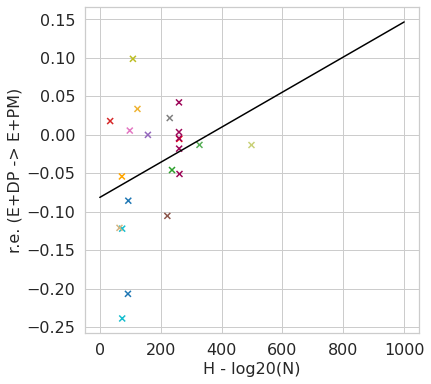

In [194]:
clf = LinearRegression()

plt.figure(figsize = (6, 6))
X = rho_df["length"].values[:,None] - np.log(rho_df["size"].values[:,None])/np.log(10)
X2 =  rho_df2["length"].values[:,None] - np.log(rho_df2["size"].values[:,None])/np.log(20)

m,M = 0,max(X)+10

y = np.log(rho_df["dca/sup/E+PM"]/rho_df["dca/sup/E+DP"])
y2 = np.log(rho_df2["dca/sup/E+PM"]/rho_df2["dca/sup/E+DP"])
clf.fit(X2,y2)
print(pearsonr(y2, X2[:,0]))
x = np.linspace(0, 1000, 100)[:,None]
plt.plot(x, clf.predict(x), c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]).values, 
            marker = "x")
plt.ylabel("r.e. (E+DP -> E+PM)", fontsize = 16)
plt.xlabel("H - log20(N)", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()


In [186]:
rho_df2.columns

Index(['dataset', 'fam', 'exp', 'inpdb', 'size', 'length', 'ind/E',
       'ind/sup/DP', 'ind/sup/PM', 'ind/sup/PM+DP', 'ind/sup/E+DP',
       'ind/sup/E+PM', 'ind/sup/E+DP+PM', 'ind/unsup/DP', 'ind/unsup/PM',
       'ind/unsup/PM+DP', 'ind/unsup/E+DP', 'ind/unsup/E+PM',
       'ind/unsup/E+DP+PM', 'dca/E', 'dca/sup/DP', 'dca/sup/PM',
       'dca/sup/PM+DP', 'dca/sup/E+DP', 'dca/sup/E+PM', 'dca/sup/E+DP+PM',
       'dca/unsup/DP', 'dca/unsup/PM', 'dca/unsup/PM+DP', 'dca/unsup/E+DP',
       'dca/unsup/E+PM', 'dca/unsup/E+DP+PM', 'best', 'H'],
      dtype='object')

(-0.37073255161988405, 0.08940794854220566)


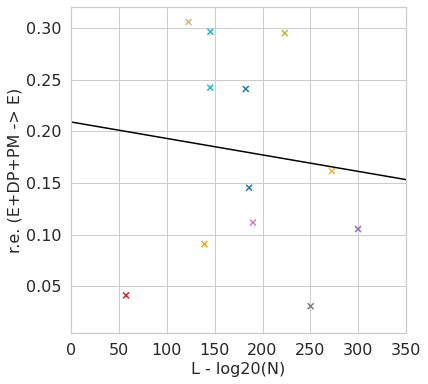

In [191]:
clf = LinearRegression()

plt.figure(figsize = (6, 6))
X = rho_df["length"].values[:,None] - np.log(rho_df["size"].values[:,None])
X2 =  rho_df2["H"].values[:,None] - np.log(rho_df2["size"].values[:,None])

m,M = 0,max(X)+10

y = np.log(rho_df["dca/sup/E+DP+PM"]/rho_df["dca/E"])
y2 = np.log(rho_df2["dca/sup/E+DP+PM"]/rho_df2["dca/E"])
clf.fit(X2,y2)
print(pearsonr(y2, X2[:,0]))
x = np.linspace(0, 1000, 100)[:,None]
plt.plot(x, clf.predict(x), c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]).values, 
            marker = "x")
plt.ylabel("r.e. (E+DP+PM -> E)", fontsize = 16)
plt.xlabel("L - log20(N)", fontsize = 16)
plt.xlim(0,350)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


#plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()


(0.0663233804946862, 0.5538398374604482)


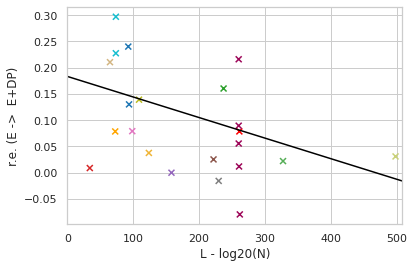

(0.08596412604520404, 0.44254017906519394)


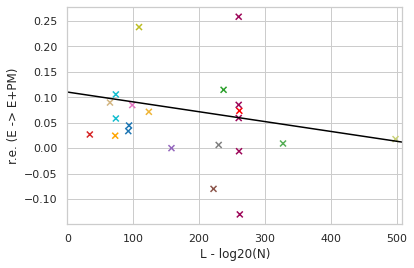

(0.18516548486190165, 0.09582518925623842)


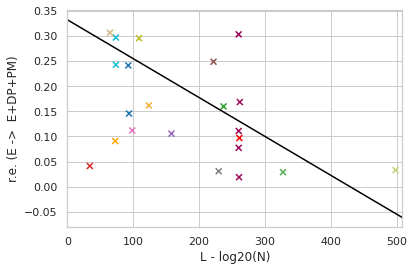

In [106]:
rho_df = rho_df.dropna()
rho_df2 = rho_df2.dropna()

X = rho_df["length"].values[:,None] - (np.log(0.8*rho_df["size"].values[:,None])/np.log(20))
X2 = rho_df2["length"].values[:,None] - (np.log(0.8*rho_df2["size"].values[:,None])/np.log(20))
m,M = 0,max(X)+10
x = np.linspace(m,M,100)

clf = HuberRegressor()
y = np.log(rho_df["dca/sup/E+DP"]/rho_df["dca/E"])
y2 =  np.log(rho_df2["dca/sup/E+DP"]/rho_df2["dca/E"])
clf.fit(X,y)
print(pearsonr(y, clf.predict(X)))
a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (E ->  E+DP)")
plt.xlabel("L - log20(N)")
plt.xlim(m,M)
plt.show()

clf = HuberRegressor()
y = np.log(rho_df["dca/sup/E+PM"]/rho_df["dca/E"])
y2 = np.log(rho_df2["dca/sup/E+PM"]/rho_df2["dca/E"])

clf.fit(X,y)
print(pearsonr(y, clf.predict(X)))

a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (E -> E+PM)")
plt.xlabel("L - log20(N)")
plt.xlim(m,M)
plt.show()

clf = HuberRegressor()
y = np.log(rho_df["dca/sup/E+DP+PM"]/rho_df["dca/E"])
y2 = np.log(rho_df2["dca/sup/E+DP+PM"]/rho_df2["dca/E"])

clf.fit(X,y)
print(pearsonr(y, clf.predict(X)))

a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (E ->  E+DP+PM)")
plt.xlabel("L - log20(N)")
plt.xlim(m,M)
plt.show()


#plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()
